# Analisi Dati per progetto Algoritmi Genetici

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.stats import norm
import os, glob

plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # fontsize of the legend

In /home/abi/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/abi/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/abi/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# Riassunto di N run
folder_path = './Data/BestHalf/'
times = np.loadtxt(folder_path+'times.dat')
generations = np.loadtxt(folder_path+'generations.dat')
corretti = np.loadtxt(folder_path+'counts.dat')
x = np.mean(generations)
error = np.std(generations)

print('Tempo medio per run =', round(np.mean(times)), 'secondi')
print('Generazione media =', round(x,1), '+-', round(error,1))
print('Percentuale correttezza =', round(np.mean(corretti),3),"%")
print('Numero di run in cui correttezza < 100% =', np.count_nonzero(corretti<100),'/',len(times))
print('Numero run in cui non è stata trovata la soluzione =', len(times)-len(corretti))

Tempo medio per run = 49.0 secondi
Generazione media = 24.2 +- 11.7
Percentuale correttezza = 98.7 %
Numero di run in cui correttezza < 100% = 11 / 100
Numero run in cui non è stata trovata la soluzione = 0


## Fitness una run

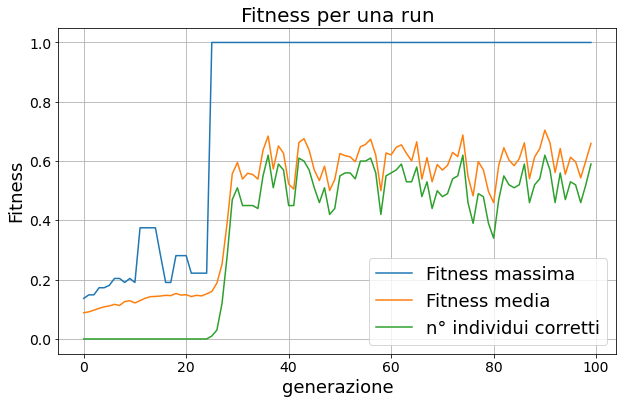

In [3]:
nind = np.loadtxt('./Data/FitMax_1_run/nind.dat')
data = np.loadtxt('./Data/FitMax_1_run/Fitness1.dat')

fitnessmedia = data[:,0]
fitnessmax = data[:,1]

# Grafico
plt.subplots(figsize=(10,6))
plt.plot(fitnessmax/fitnessmax[-1], label = 'Fitness massima')
plt.plot(fitnessmedia/fitnessmax[-1], label = 'Fitness media')
plt.plot(nind/100, label='n° individui corretti')

plt.title('Fitness per una run', fontsize=20)
plt.xlabel('generazione')
plt.ylabel('Fitness')
plt.legend(loc=0)
plt.grid(True)

plt.savefig('./Relazione/Grafici/Fitness_max&mean_1_run_NORMALIZZATA.pdf')
plt.show()

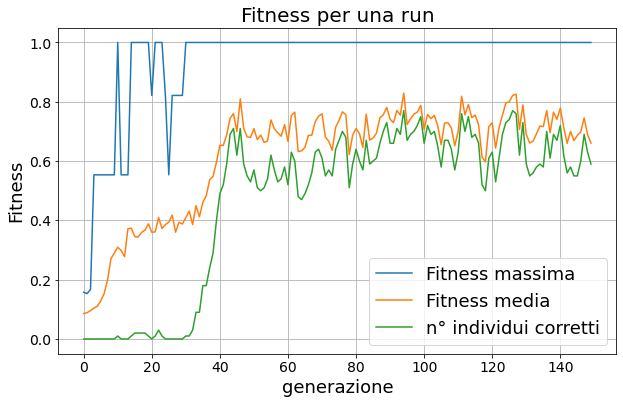

In [4]:
nind = np.loadtxt('./Data/FitMax_200_Run/Nind/Nind25.dat')
data = np.loadtxt('./Data/FitMax_200_Run/Fit/Fitness25.dat')

fitnessmedia = data[:,0]
fitnessmax = data[:,1]

# Grafico
plt.subplots(figsize=(10,6))
plt.plot(fitnessmax/fitnessmax[-1], label = 'Fitness massima')
plt.plot(fitnessmedia/fitnessmax[-1], label = 'Fitness media')
plt.plot(nind/100, label='n° individui corretti')

plt.title('Fitness per una run', fontsize=20)
plt.xlabel('generazione')
plt.ylabel('Fitness')
plt.legend(loc=0)
plt.grid(True)
plt.savefig('./Relazione/Presentazione/Fitness_max&mean_BACKUP_SLIDE.pdf')
plt.show()

## Media fitness 200 run

Generazione media =  21.314432989690722 +- 9.154971492528787


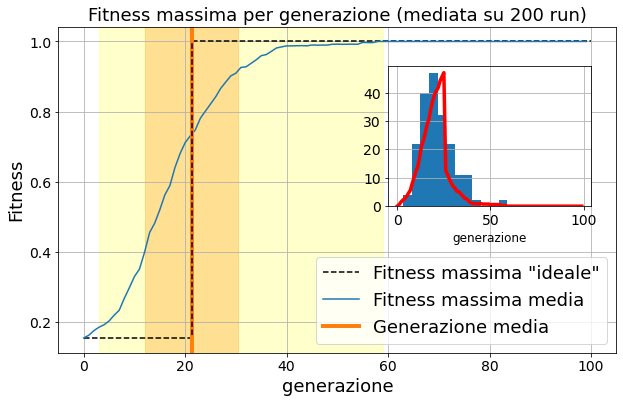

In [36]:
Npop = 100
nrun = 200
fitmax_media = np.zeros(100)
fitmean_media = np.zeros(100)
Nind = np.zeros(100)

folder_path = './Data/FitMax_200_Run/Fit/'
for filename in glob.glob(os.path.join(folder_path, '*.dat')):
    with open(filename, 'r') as f:
        data = np.loadtxt(filename)
        
        fitmean = data[:,0]
        fitmax = data[:,1]
        fitmean = fitmean[:100]
        fitmax = fitmax[:100]
        fitmax_media += np.array(fitmax)
        fitmean_media += np.array(fitmean)
        
fitmax_media /= nrun
fitmean_media /= nrun

folder_path = './Data/FitMax_200_Run/Nind/'
for filename in glob.glob(os.path.join(folder_path, '*.dat')):
    with open(filename, 'r') as f:
        nind = np.loadtxt(filename)
        nind = nind[:100]
        Nind += np.array(nind)
        
Nind /= nrun

generations = np.loadtxt('./Data/FitMax_200_Run/generations.dat')
x = np.mean(generations)
error = np.std(generations)
print('Generazione media = ', x,'+-', error)
fitmax_media /= fitmax_media[-1]

fig, ax = plt.subplots(figsize=(10,6))
axins = ax.inset_axes([60, 0.53, 40, 0.4], transform=ax.transData)
ax.plot(np.linspace(0,x,2), np.linspace(0,x,2)*0 + fitmax_media[0], 'k--', label='Fitness massima "ideale"')
ax.plot(np.linspace(x, 100 ,2), np.linspace(x,100,2)*0 + fitmax_media[-1], 'k--')

ax.plot(fitmax_media, label= 'Fitness massima media', color='C0')

ax.axvline(x, color='C1', label = 'Generazione media', lw=4)
ax.plot(np.linspace(fitmax_media[0], fitmax_media[-1], 2)*0 + x, np.linspace(fitmax_media[1], fitmax_media[-1], 2), 'k--')

ax.axvspan(x-error, x+error, color = 'C1', alpha=0.3)
ax.axvspan(generations.min(), generations.max(), color = 'yellow', alpha=0.2)

plt.title('Fitness massima per generazione (mediata su 200 run)', fontsize=18)
ax.set_xlabel('generazione')
ax.set_ylabel('Fitness')
ax.legend(loc=0)
ax.grid(True)

fit1 = []
for i in range(26): # tra 0 e 25
    fit1.append(abs(fitmax_media[i]-fitmax_media[0]))
    
for i in range(74): # tra 0 e 75
    fit1.append(abs(fitmax_media[-1]-fitmax_media[25+i])) # tra 25 e 99    

n, bins, patches = axins.hist(generations, bins=12)
axins.plot(fit1/max(fit1)*max(n), lw=3.5, color='red')
axins.grid(True)
axins.set_xlabel('generazione', fontsize='large')
plt.savefig('./Relazione/Grafici/Fitness_max_200_run_theta_INSET.pdf')
plt.show()

## Istogramma generazioni 1000 run

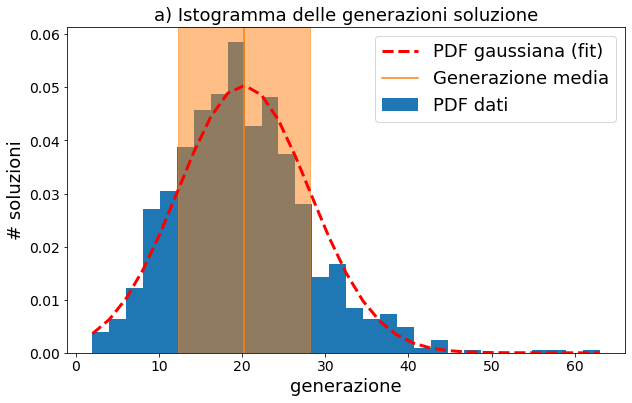

In [6]:
folder_path = './Data/Fitness_1000_run/Depth=10a/'
times = np.loadtxt(folder_path+'times.dat')
generations = np.loadtxt(folder_path+'generations.dat')
corretti = np.loadtxt(folder_path+'counts.dat')
x = np.mean(generations)
error = np.std(generations)

plt.figure(figsize=(10,6))
# Disegno l'istogramma e la Gaussiana che lo fitta
n, bins, patches = plt.hist(generations, bins = 30, density = True, label='PDF dati')
(mu, sigma) = scipy.stats.norm.fit(generations)
y = scipy.stats.norm.pdf( bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth = 3, label='PDF gaussiana (fit)')

plt.axvline(x, color='C1', label = 'Generazione media')
plt.axvspan(x-error, x+error, color = 'C1', alpha=0.5)

plt.title('a) Istogramma delle generazioni soluzione', fontsize=18)
plt.xlabel('generazione')
plt.ylabel('# soluzioni')
plt.legend(loc=0)

plt.savefig('./Relazione/Presentazione/Histo_Gauss.pdf')
plt.show()

Tempo medio per run = 37.0 secondi
Generazione media = 22.0 +- 9.5
Percentuale correttezza = 99.04 %
Numero di run in cui correttezza < 100% = 67 / 1000
Numero run in cui non è stata trovata la soluzione = 0
Percentuale di dati entro un sigma =  75.3 %


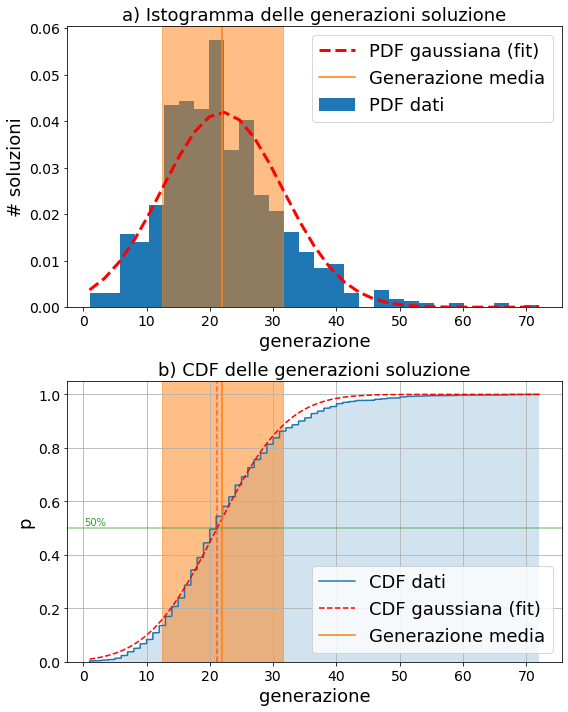

In [7]:
folder_path = './Data/Fitness_1000_run/Depth=10/'
times = np.loadtxt(folder_path+'times.dat')
generations = np.loadtxt(folder_path+'generations.dat')
corretti = np.loadtxt(folder_path+'counts.dat')
x = np.mean(generations)
error = np.std(generations)

print('Tempo medio per run =', round(np.mean(times)), 'secondi')
print('Generazione media =', round(x,1), '+-', round(error,1))
print('Percentuale correttezza =', round(np.mean(corretti),3),"%")
print('Numero di run in cui correttezza < 100% =', np.count_nonzero(corretti<100),'/',len(times))
print('Numero run in cui non è stata trovata la soluzione =', len(times)-len(corretti))

#Istogramma
plt.subplots(figsize=(8, 10))
plt.subplot(2,1,1)

# Disegno l'istogramma e la Gaussiana che lo fitta
n, bins, patches = plt.hist(generations, bins = 30, density = True, label='PDF dati')
(mu, sigma) = scipy.stats.norm.fit(generations)
y = scipy.stats.norm.pdf( bins, mu, sigma)
plt.plot(bins, y, 'r--', linewidth = 3, label='PDF gaussiana (fit)')

plt.axvline(x, color='C1', label = 'Generazione media')
plt.axvspan(x-error, x+error, color = 'C1', alpha=0.5)

plt.title('a) Istogramma delle generazioni soluzione', fontsize=18)
plt.xlabel('generazione')
plt.ylabel('# soluzioni')
plt.legend(loc=0)

# Ordino i dati
data_sorted = np.sort(generations)
# Calcolo la CDF dei dati
p = 1. * np.arange(len(generations)) / (len(generations) - 1)

def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

inf = find_nearest(data_sorted, x-error)
sup = find_nearest(data_sorted, x+error)
print('Percentuale di dati entro un sigma = ', round((sup-inf)/len(generations)*100, 3),'%')

# Fit CDF Gaussiana
mu, sigma = curve_fit(norm.cdf, data_sorted, p, p0=[0,1])[0]
y = norm.cdf(data_sorted, mu, sigma)

# plot CDF e CDF fittata
plt.subplot(2,1,2)
plt.hist(generations, cumulative=True, density=True, bins=1000, alpha=0.2)
plt.plot(data_sorted, p, label='CDF dati', color='C0')

plt.plot(data_sorted, y, 'r--', label='CDF gaussiana (fit)')

plt.axvline(x, color='C1', label = 'Generazione media')
plt.axvspan(x-error, x+error, color = 'C1', alpha=0.5)
plt.axvline(mu, ls='--', alpha=0.5, color='red')

plt.axhline(0.5, color='C2', alpha=0.5)
plt.text(0.1, 0.51, '50%', color='C2')

plt.title('b) CDF delle generazioni soluzione', fontsize=18)
plt.xlabel('generazione')
plt.ylabel('p')
plt.legend(loc=0)

plt.grid(True)
plt.tight_layout()
plt.savefig('./Relazione/Grafici/CDF&Hist1000_run.pdf')
plt.show()

## Confronti parametri

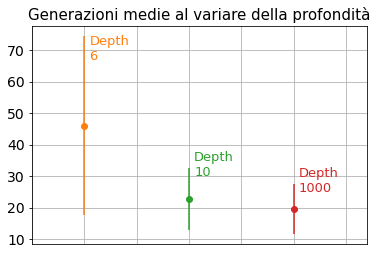

In [8]:
i = 1
y = []
err = []
folder_path = './Data/Data_LIMDU/Data6/'
generations = np.loadtxt(folder_path+'generations.dat')

y = np.mean(generations)
error = np.std(generations)

plt.errorbar(1, y, yerr=error, fmt='C'+str(i)+'o')
plt.text(1.05, 67, 'Depth\n6', color='C'+str(i), fontsize=13)
i+=1

folder_path = './Data/Data_LIMDU/Data10/'
generations = np.loadtxt(folder_path+'generations.dat')

y = np.mean(generations)
error = np.std(generations)

plt.errorbar(2, y, yerr=error, fmt='C'+str(i)+'o')
plt.text(2.05, 30, 'Depth\n10', color='C'+str(i), fontsize=13)
i+=1

folder_path = './Data/Data_LIMDU/Data1000/'
generations = np.loadtxt(folder_path+'generations.dat')

y = np.mean(generations)
error = np.std(generations)

plt.errorbar(3, y, yerr=error, fmt='C'+str(i)+'o')
plt.text(3.05, 25, 'Depth\n1000', color='C'+str(i), fontsize=13)
i+=1

N = [1, 2, 3]
plt.xlim(0.5, 3.7)
#plt.errorbar(N, y, yerr=err, fmt="ro")

plt.title('Generazioni medie al variare della profondità', fontsize=15)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.grid(True)
plt.savefig('./Relazione/Grafici/VarieDepth.pdf')
plt.show()

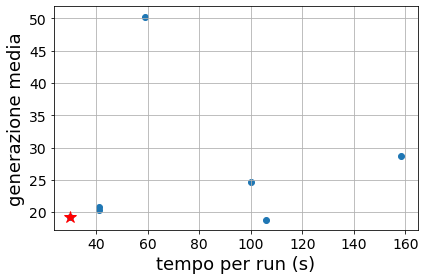

In [9]:
import os
import pathlib

tempi = []
generazioni = []
folder_path = './Data/Tempi_E_Gen/'
for path in pathlib.Path(folder_path).iterdir():
    if path.is_dir():

        gen = np.loadtxt(str(path) + '/generations.dat')
        times = np.loadtxt(str(path)+'/times.dat')
        
        tempi.append(np.mean(times))
        generazioni.append(np.mean(gen))
        
plt.scatter(tempi, generazioni)

appo = np.array(tempi) + np.array(generazioni)
plt.plot(tempi[np.argmin(appo)], generazioni[np.argmin(appo)], 'r*',markersize = 13)

plt.xlabel('tempo per run (s)')
plt.ylabel('generazione media')
plt.grid(True)
plt.tight_layout()
plt.savefig('./Relazione/Grafici/tempi_vs_generazioni.pdf')

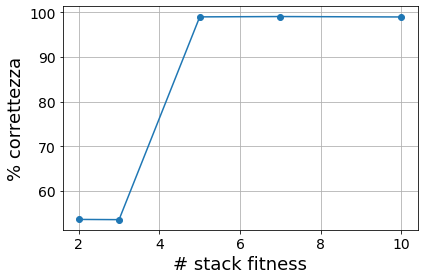

In [10]:
counts = []
Nstacks = []

corretti = np.loadtxt('Data/Stacks/2stacks/counts.dat')
counts.append(np.mean(corretti))
Nstacks.append(2)

corretti = np.loadtxt('Data/Stacks/3stacks/counts.dat')
counts.append(np.mean(corretti))
Nstacks.append(3)

corretti = np.loadtxt('Data/Stacks/5stacks/counts.dat')
counts.append(np.mean(corretti))
Nstacks.append(5)

corretti = np.loadtxt('Data/Stacks/7stacks/counts.dat')
counts.append(np.mean(corretti))
Nstacks.append(7)

corretti = np.loadtxt('Data/Stacks/10stacks/counts.dat')
counts.append(np.mean(corretti))
Nstacks.append(10)


plt.plot(Nstacks, counts, 'o-')
plt.grid(True)
plt.xlabel('# stack fitness')
plt.ylabel('% correttezza')
plt.tight_layout()
plt.savefig('./Relazione/Presentazione/Correttezza.pdf')
plt.show()